In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts.notebook_utils import notebookUtils
from v2.research.scripts.scoreboard import updateScoreboard
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance


/home/marshingjay/Repos/vivaldi/back_testing


In [2]:
nu = notebookUtils()
model_name = "CLASSIFICATION_CHANGE_THIS"

In [3]:
dataset, features, indicators = nu.loadData(indicators=[('rsi', 'close'), ('optimal_v2', 'close')],
                            param_spec={},
                            optimal_threshold={'buy':0.8},
                            spans=[{'indicator_name':'willr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'cci',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'rsi',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]}
                                    ],

                            scale='minmaxwindow')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi




Loading data from EGLDUSDT-1m...
Loading data from chunk 0...


In [4]:
edit_dataset = dataset.drop(["time", "open", "high", "low"], axis=1)
edit_dataset.dropna(inplace=True)
edit_dataset

,close,volume,RSI,optimal,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
15089,13.260394,57.020,0.566880,0.0,0.524025,0.347258,0.171429,0.585129,1.000000e+00,0.575360,...,0.545894,0.540635,0.511542,0.325209,0.370513,0.587016,0.345583,0.237764,0.218740,0.415016
15090,13.265197,13.720,0.569772,0.0,0.538305,0.709294,0.256107,0.614432,8.188383e-01,0.793017,...,0.543983,0.539407,0.517151,0.479258,0.363576,0.561043,0.348232,0.302651,0.216340,0.395539
15091,13.274098,55.176,0.582142,0.0,0.503981,0.663856,0.397764,0.669456,1.000000e+00,0.892327,...,0.547240,0.539899,0.541143,0.500138,0.397986,0.572955,0.359561,0.312278,0.229825,0.403022
15092,13.293049,1095.762,0.608114,0.0,0.473141,0.391638,0.256612,0.477138,1.000000e+00,0.984863,...,0.554561,0.543246,0.559068,0.543978,0.434230,0.605251,0.367161,0.332492,0.244713,0.423875
15093,13.302525,0.000,0.608114,0.0,0.468813,0.384809,0.312166,0.514192,5.290369e-01,0.652195,...,0.558221,0.544919,0.553458,0.543978,0.434230,0.605251,0.364437,0.332492,0.244713,0.423875
15094,13.307262,0.000,0.608114,0.0,0.472025,0.403551,0.339943,0.529912,2.760673e-01,0.601675,...,0.559630,0.545420,0.529467,0.515737,0.431602,0.600971,0.353027,0.318736,0.243679,0.420710
15095,13.309631,0.000,0.608114,0.0,0.565339,0.355557,0.353831,0.535927,9.000000e-01,0.544742,...,0.573430,0.545670,0.479092,0.510855,0.563641,0.600971,0.330260,0.316421,0.301917,0.420710
15096,13.301316,17.158,0.581144,0.0,0.502038,0.314433,0.305077,0.474413,6.608616e-12,0.150858,...,0.576335,0.542127,0.426784,0.444452,0.523344,0.546008,0.307414,0.286635,0.283443,0.384253
15097,13.297158,21.517,0.581144,0.0,0.477404,0.370545,0.276464,0.455987,1.567999e-01,0.194304,...,0.577790,0.540357,0.426784,0.400612,0.523344,0.546008,0.307414,0.267965,0.283443,0.384253
15098,13.292579,74.248,0.574127,0.0,0.495724,0.353349,0.176738,0.433184,8.799263e-03,0.241915,...,0.577460,0.538808,0.413175,0.388768,0.512860,0.535475,0.301471,0.262914,0.278637,0.377546


In [5]:
trainX, testX, trainy, testy = nu.splitData(edit_dataset, split_size=0.2, y_column_name="optimal", shuffle_data=False, balance_unbalanced_data=True, balance_info={'multiplier_val':4, 'superset_class_val':0, 'randomize_concat':True})
trainX

,close,volume,RSI,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,CCI_close_period_10,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
0,7.398824,559.659,0.534531,0.459536,0.539242,0.435796,0.690552,4.147722e-12,1.999802e-01,3.793963e-01,...,0.569973,0.419094,0.531814,0.465147,0.542622,0.528683,0.534661,0.404960,0.445103,0.318816
1,8.446420,1201.193,0.530179,0.526360,0.629689,0.683892,0.773425,9.429065e-01,8.712940e-01,6.873016e-01,...,0.582698,0.614032,0.482201,0.510286,0.470396,0.584668,0.433906,0.414486,0.436966,0.353995
2,7.151499,0.000,0.314568,0.511571,0.711264,0.866949,0.929202,7.702849e-01,6.279119e-01,5.434016e-01,...,0.542022,0.479926,0.594850,0.543988,0.570963,0.571227,0.522799,0.442558,0.442823,0.362782
3,9.913911,0.000,0.501436,0.395805,0.315765,0.059704,0.020719,5.434870e-12,7.487689e-02,3.280246e-01,...,0.596192,0.583142,0.525004,0.461705,0.411579,0.466910,0.376807,0.358735,0.382692,0.258738
4,10.127203,0.000,0.386940,0.517976,0.821688,0.009355,0.003822,1.000000e-01,2.758621e-01,4.054624e-01,...,0.599760,0.579317,0.533155,0.505280,0.436536,0.536988,0.383001,0.386810,0.394041,0.292918
5,7.723377,0.000,0.378164,0.425298,0.280467,0.137116,0.107524,2.085096e-01,3.050787e-01,3.429022e-01,...,0.340720,0.501285,0.371828,0.251798,0.288782,0.398348,0.349295,0.275742,0.288210,0.295241
6,10.341490,183.214,0.606588,0.483239,0.789109,0.870236,0.888457,9.418266e-01,8.389605e-01,6.830869e-01,...,0.648224,0.609104,0.573122,0.545993,0.535227,0.580321,0.410610,0.411294,0.458260,0.316471
7,8.583907,376.512,0.444480,0.515041,0.699726,0.327416,0.304794,9.038235e-01,7.062416e-01,4.382358e-01,...,0.412742,0.329365,0.658200,0.568640,0.526934,0.526775,0.488911,0.416097,0.330410,0.292878
8,8.629155,482.956,0.339347,0.500129,0.381875,0.101290,0.303425,1.095343e-01,2.926054e-01,3.681689e-01,...,0.501243,0.561263,0.434178,0.460544,0.402291,0.557891,0.393197,0.370487,0.376758,0.346993
9,7.880112,0.000,0.432676,0.456100,0.540374,0.201797,0.197724,8.735013e-01,4.309601e-01,3.930478e-01,...,0.500865,0.536456,0.517756,0.537767,0.459449,0.293038,0.472994,0.419229,0.349567,0.211967


In [6]:
class_weights = nu.getWeights(trainy)
class_weights

{0: 0.5625, 1: 4.5}

In [7]:
testX

,close,volume,RSI,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,CCI_close_period_10,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
104539,7.390002,706.156,0.529547,0.559353,0.697430,0.782928,0.782677,1.000000e+00,0.881507,0.745273,...,0.495475,0.602284,0.875769,0.916189,0.603297,0.573422,0.788587,0.690593,0.396483,0.319848
104540,7.394501,108.642,0.498834,0.567321,0.679960,0.821919,0.821801,7.476133e-01,0.749197,0.704880,...,0.534485,0.610407,0.797055,0.738499,0.636952,0.573037,0.702695,0.518541,0.428410,0.320751
104541,7.359251,583.737,0.376622,0.513518,0.479961,0.516401,0.515250,6.177174e-12,0.309916,0.467267,...,0.477019,0.564772,0.400978,0.572872,0.533737,0.471002,0.317468,0.390376,0.348742,0.247364
104542,7.357125,504.988,0.435291,0.514603,0.465285,0.497981,0.496768,2.134903e-01,0.242560,0.451541,...,0.474828,0.567879,0.397785,0.645482,0.564177,0.540653,0.324581,0.446785,0.371578,0.298189
104543,7.355563,153.553,0.433813,0.539441,0.454495,0.484437,0.483179,1.000000e+00,0.380889,0.504087,...,0.481697,0.568691,0.450265,0.486159,0.580646,0.539162,0.365588,0.327111,0.385777,0.297089
104544,7.363281,79.747,0.464330,0.575472,0.528635,0.489202,0.550303,9.957522e-01,0.540911,0.536898,...,0.558441,0.581718,0.724432,0.438429,0.707118,0.569963,0.627285,0.298720,0.504943,0.319788
104545,7.367141,0.000,0.464330,0.549485,0.672931,0.512830,0.583865,7.867860e-01,0.763622,0.525785,...,0.558136,0.587493,0.619115,0.487407,0.609022,0.566532,0.516822,0.329245,0.407769,0.317133
104546,7.375570,253.446,0.487206,0.529320,0.757284,0.598564,0.657172,1.000000e+00,0.813641,0.569013,...,0.588692,0.603732,0.662832,0.718780,0.659129,0.603184,0.558161,0.503083,0.450699,0.344982
104547,7.380785,100.568,0.490690,0.561399,0.754636,0.651601,0.702522,9.176278e-01,0.820154,0.581960,...,0.599944,0.616307,0.614304,0.630777,0.647398,0.617411,0.510786,0.429901,0.439098,0.356512
104548,7.393393,810.634,0.524748,0.545687,0.646160,0.779825,0.812160,1.000000e+00,0.885616,0.628577,...,0.577362,0.638947,0.675442,0.687446,0.569162,0.657126,0.566429,0.470988,0.370247,0.387204


In [8]:
clf = RandomForestClassifier(random_state=69420, class_weight=class_weights, n_jobs=-1, n_estimators=100, criterion='gini', min_samples_leaf=2)
clf.fit(trainX.drop("close", axis=1).values, trainy.values)

print(clf.score(testX.drop("close", axis=1).values, testy.values))

feature_importances = permutation_importance(clf, trainX.drop("close", axis=1).values, trainy.values, n_repeats=10, random_state=69420)

for i in range(len(feature_importances.importances_mean)):
    print('i: {}, Feature: {}, Score: {}'.format(i, trainX.drop("close", axis=1).columns[i], feature_importances.importances_mean[i]))

0.9876134686759379


In [9]:
reduced_classified_data = nu.classifyPoints(clf, testX, predict_proba=False, proba_thresh=0.6, plot_optimal=True, optimal=testy)

In [10]:
smaller_view_data = reduced_classified_data[1000:2000]
smaller_view_data.reset_index(inplace=True)

<Figure size 432x288 with 0 Axes>

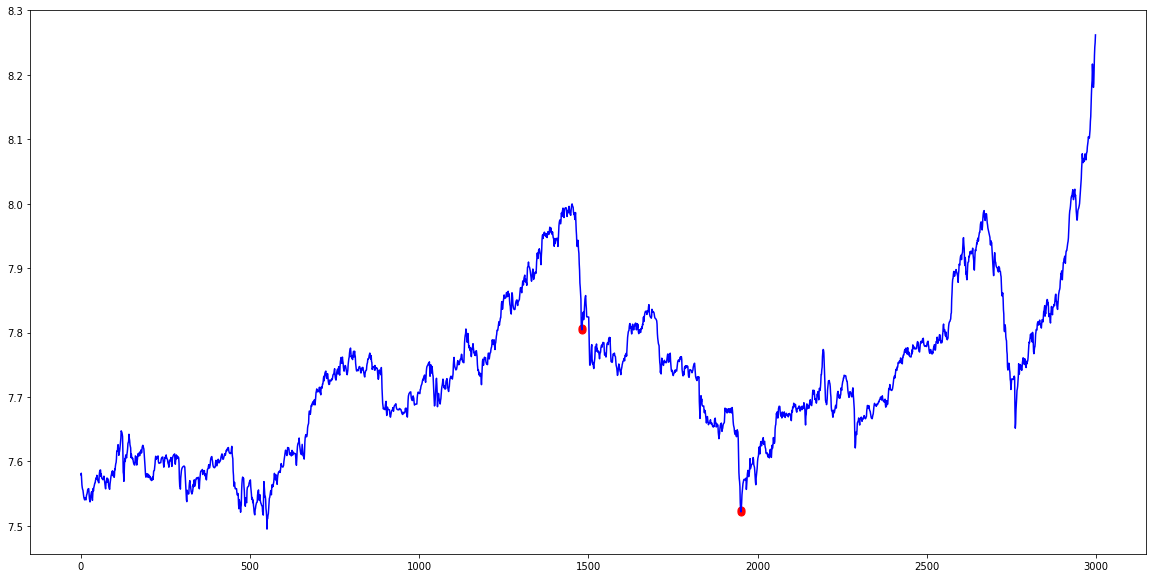

In [11]:
nu.graphPoints(smaller_view_data, mode="buy", plot_optimal=True)

In [12]:
features = ['volume'] + features

In [13]:
model_version = nu.exportModel(clf, model_name, new_version=False, indicators=indicators, features=features, proba_threshold=0.0, is_nn=False)

In [14]:
score, trades = nu.testModel(model_name)

Importing Strategies...
Generating Model Data...
Scaling Model Data...
Preprocessing Model Predictions...
0it [00:00, ?it/s]Generating Algo Data...
Executing Strategy...
105553it [00:00, 311204.92it/s]
Generating Report...


In [15]:
updateScoreboard(model_name, model_version, score, trades, features)